In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

# 数据的读取、预览

In [53]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("train_data: " + str(train_data.shape))
print("test_data: " + str(test_data.shape))

train_data.describe()

train_data: (891, 12)
test_data: (418, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hoyt, Mr. William Fisher",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
train_data.info()
print("-"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# 数据分析

In [58]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


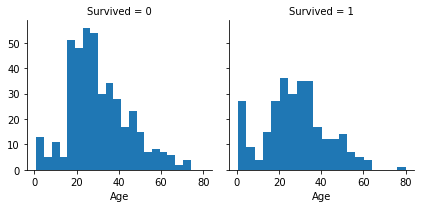

In [59]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


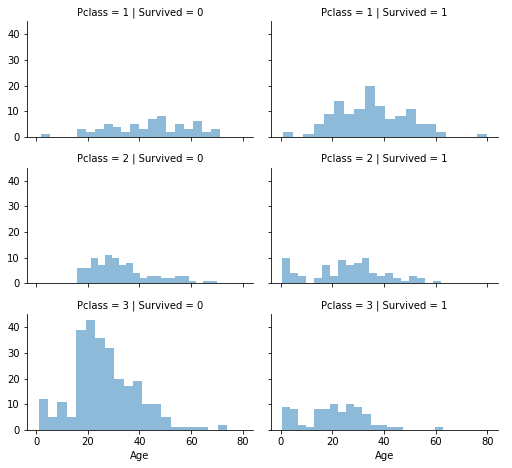

In [60]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


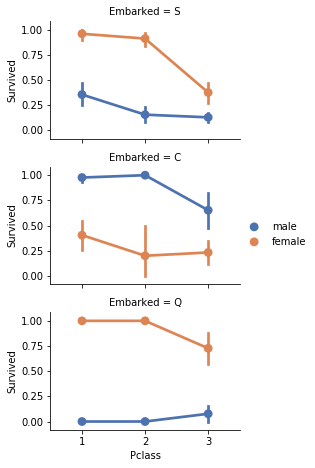

In [61]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


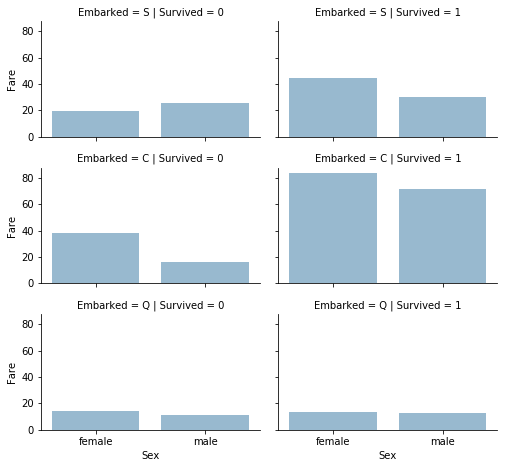

In [62]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# 分析特征，特征提取

In [63]:
print("Before", train_data.shape, test_data.shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

print("After", train_data.shape, test_data.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [64]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [65]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [66]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['Title'])], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Title'])], axis=1)
train_data = train_data.drop(['Name', 'Title'], axis=1)
test_data = test_data.drop(['Name', 'Title'], axis=1)
combine = [train_data, test_data]

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,0


In [67]:
train_data = pd.concat([train_data, pd.get_dummies(train_data[['Sex', 'Embarked']])], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data[['Sex', 'Embarked']])], axis=1)
train_data = train_data.drop(['Sex', 'Embarked'], axis=1)
test_data = test_data.drop(['Sex', 'Embarked'], axis=1)
combine = [train_data, test_data]

train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,1,0,0,1


# 划分训练集、校验集，交叉验证等，数据清洗

In [68]:
X = train_data.drop(['PassengerId', 'Survived'], axis=1)
y = train_data["Survived"]

X_test = test_data.drop(['PassengerId'], axis=1)

print("X: " + str(X.shape))
print("y: " + str(y.shape))
print("X_test: " + str(X_test.shape))


X: (891, 15)
y: (891,)
X_test: (418, 15)


In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

print("X_train: " + str(X_train.shape))
print("X_val: " + str(X_val.shape))
print("y_train: " + str(y_train.shape))
print("y_val: " + str(y_val.shape))

X_train: (668, 15)
X_val: (223, 15)
y_train: (668,)
y_val: (223,)


In [70]:
imputer = SimpleImputer()
X_train_imputed =  imputer.fit_transform(X_train)
X_val_imputed =  imputer.transform(X_val)
X_test_imputed =  imputer.transform(X_test)

In [72]:
lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)
score_train_lr = lr.score(X_train_imputed, y_train)
score_val_lr = lr.score(X_val_imputed, y_val)
y_pred_lr = lr.predict(X_test_imputed)

print("train acc: ", score_train_lr)
print("val acc: ", score_val_lr)

train acc:  0.8353293413173652
val acc:  0.8071748878923767


/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_imputed, y_train)
score_train_dtc = dtc.score(X_train_imputed, y_train)
score_val_dtc = dtc.score(X_val_imputed, y_val)
y_pred_dtc = dtc.predict(X_test_imputed)

print("train acc: ", score_train_dtc)
print("val acc: ", score_val_dtc)

train acc:  0.9880239520958084
val acc:  0.7937219730941704


In [76]:
rfc = RandomForestClassifier()
rfc.fit(X_train_imputed, y_train)
score_train_rfc = rfc.score(X_train_imputed, y_train)
score_val_rfc = rfc.score(X_val_imputed, y_val)
y_pred_rfc = rfc.predict(X_test_imputed)

print("train acc: ", score_train_rfc)
print("val acc: ", score_val_rfc)

train acc:  0.9715568862275449
val acc:  0.7847533632286996


/home/leon/.conda/envs/test_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
xgbr = XGBRegressor()
xgbr.fit(X_train_imputed, y_train)
score_train_xgbr = xgbr.score(X_train_imputed, y_train)
score_val_xgbr = xgbr.score(X_val_imputed, y_val)
y_pred_xgbr = xgbr.predict(X_test_imputed)

print("train acc: ", score_train_xgbr)
print("val acc: ", score_val_xgbr)

train acc:  0.6403918475909941
val acc:  0.4001069941843287


In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'Decision Tree',
              'XGBoost'],
    'Score_train': [score_train_lr, score_train_dtc, score_train_rfc, 
              score_train_xgbr],
    'Score_dev': [score_val_lr, score_val_dtc, score_val_rfc, 
              score_val_xgbr]})
models.sort_values(by='Score_train', ascending=False)

,Model,Score_train,Score_dev
1,Random Forest,0.988024,0.793722
2,Decision Tree,0.971557,0.784753
0,Logistic Regression,0.835329,0.807175
3,XGBoost,0.640392,0.400107


In [81]:
models.sort_values(by='Score_dev', ascending=False)

,Model,Score_train,Score_dev
0,Logistic Regression,0.835329,0.807175
1,Random Forest,0.988024,0.793722
2,Decision Tree,0.971557,0.784753
3,XGBoost,0.640392,0.400107


In [84]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_lr
    })
submission.to_csv('submission.csv', index=False)